In [172]:
# import libraries
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [173]:
# read in the file that I created in Microsoft Excel containing the dataset of concussions 
# and lower body injuries from the last 10 seasons in the NBA
df = pd.read_excel('Pre and Post Concussion Injury Data.xlsx')

In [174]:
df

,Date of Concussion,End Date of Concussion,Team,Player,Date of First Injury Pre-Concussion,Number of Injuries Pre-Concussion,Games Missed out of Previous 82,Date of First Injury Post Concussion,Number of Injuries Post-Concussion,Games Missed out of Next 82
0,2010-12-20,2011-01-21,Bucks,Carlos Delfino,NaT,1,0,NaT,1,0
1,2011-02-25,2011-02-27,Spurs,Gary Neal,NaT,1,0,NaT,1,0
2,2011-02-26,2011-03-04,Bucks,Ersan Ilyasova,NaT,1,0,NaT,1,0
3,2011-03-07,2011-03-12,Hornets,Chris Paul,NaT,1,0,2012-01-16,1,5
4,2011-04-11,2011-04-13,Warriors,Monta Ellis,NaT,1,0,NaT,1,0
5,2012-01-13,2012-01-13,Bucks,Andrew Bogut,NaT,1,0,NaT,1,0
6,2012-01-18,2012-01-19,Pacers,Jeff Ayres,2012-01-07,1,2,NaT,1,0
7,2012-02-06,2012-03-15,Hornets,Jason Smith,NaT,1,0,2012-04-24,1,1
8,2012-02-08,2012-02-15,Cavaliers,Kyrie Irving,NaT,1,0,NaT,1,0
9,2012-03-03,2012-03-13,Mavericks,Brandan Wright,NaT,1,0,2012-12-20,1,12


In [175]:
# add columns for the proportion of the 82 games before the concussion that were missed
# and the proportion of the 82 games after the concussion that were missed
df.insert(7, "Relative Frequency Missed Pre Concussion", 0)
df.insert(11, "Relative Frequency Missed Post Concussion", 0)

# calculate the proportion of missed games pre and post concussion
df['Relative Frequency Missed Pre Concussion'] = df['Games Missed out of Previous 82'] / 82
df['Relative Frequency Missed Post Concussion'] = df['Games Missed out of Next 82'] / 82

In [176]:
df

,Date of Concussion,End Date of Concussion,Team,Player,Date of First Injury Pre-Concussion,Number of Injuries Pre-Concussion,Games Missed out of Previous 82,Relative Frequency Missed Pre Concussion,Date of First Injury Post Concussion,Number of Injuries Post-Concussion,Games Missed out of Next 82,Relative Frequency Missed Post Concussion
0,2010-12-20,2011-01-21,Bucks,Carlos Delfino,NaT,1,0,0.000000,NaT,1,0,0.000000
1,2011-02-25,2011-02-27,Spurs,Gary Neal,NaT,1,0,0.000000,NaT,1,0,0.000000
2,2011-02-26,2011-03-04,Bucks,Ersan Ilyasova,NaT,1,0,0.000000,NaT,1,0,0.000000
3,2011-03-07,2011-03-12,Hornets,Chris Paul,NaT,1,0,0.000000,2012-01-16,1,5,0.060976
4,2011-04-11,2011-04-13,Warriors,Monta Ellis,NaT,1,0,0.000000,NaT,1,0,0.000000
5,2012-01-13,2012-01-13,Bucks,Andrew Bogut,NaT,1,0,0.000000,NaT,1,0,0.000000
6,2012-01-18,2012-01-19,Pacers,Jeff Ayres,2012-01-07,1,2,0.024390,NaT,1,0,0.000000
7,2012-02-06,2012-03-15,Hornets,Jason Smith,NaT,1,0,0.000000,2012-04-24,1,1,0.012195
8,2012-02-08,2012-02-15,Cavaliers,Kyrie Irving,NaT,1,0,0.000000,NaT,1,0,0.000000
9,2012-03-03,2012-03-13,Mavericks,Brandan Wright,NaT,1,0,0.000000,2012-12-20,1,12,0.146341


In [177]:
# perform a paired t-test (hypothesis test) on the distributions of relative frequency of games missed
# out of 82 pre- and post-concussion games
stat, p = ttest_rel(df['Relative Frequency Missed Pre Concussion'], df['Relative Frequency Missed Post Concussion'])
print('stat=%.5f, p=%.5f' % (stat, p))

stat=-1.35856, p=0.17702


In [178]:
# perform a paired t-test (hypothesis test) on the distributions of number of lower body 
# soft tissue injuries during the year pre- and post-concussion
stat, p = ttest_rel(df['Number of Injuries Pre-Concussion'], df['Number of Injuries Post-Concussion'])
print('stat=%.5f, p=%.5f' % (stat, p))

stat=-1.15246, p=0.25158


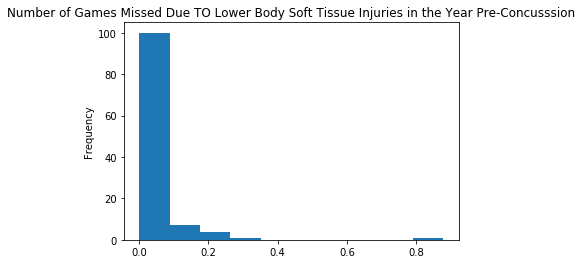

In [179]:
# plot histogram for frequency of games missed 82 games pre-concussion
# due to lower-body soft tissue injuries
x = df['Relative Frequency Missed Pre Concussion']
plt.hist(x, bins = 10)

plt.title("Number of Games Missed Due TO Lower Body Soft Tissue Injuries in the Year Pre-Concusssion")
plt.ylabel("Frequency")
plt.show()

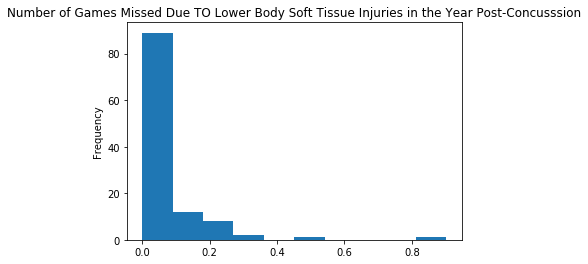

In [180]:
# plot histogram for frequency of games missed 82 games post-concussion
# due to lower-body soft tissue injuries
y = df['Relative Frequency Missed Post Concussion']
plt.hist(y, bins = 10)

plt.title("Number of Games Missed Due TO Lower Body Soft Tissue Injuries in the Year Post-Concusssion")
plt.ylabel("Frequency")
plt.show()

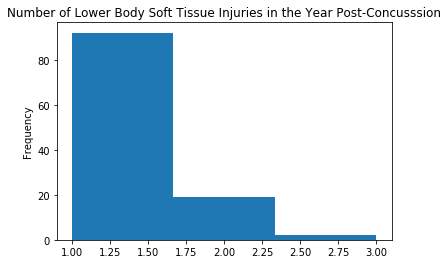

In [181]:
# plot histogram for number of lower body soft tissue
# injuries in the year pre-concussion
y = df['Number of Injuries Pre-Concussion']
plt.hist(y, bins = 3)

plt.title("Number of Lower Body Soft Tissue Injuries in the Year Post-Concusssion")
plt.ylabel("Frequency")
plt.show()

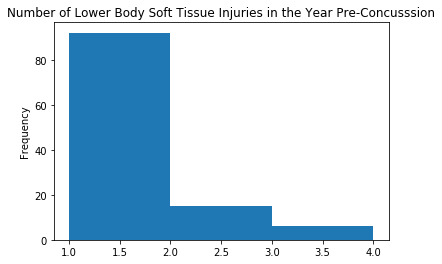

In [182]:
# plot histogram for number of lower body soft tissue
# injuries in the year post-concussion
y = df['Number of Injuries Post-Concussion']
plt.hist(y, bins = 3)

plt.title("Number of Lower Body Soft Tissue Injuries in the Year Pre-Concusssion")
plt.ylabel("Frequency")
plt.show()

In [183]:
print(type(df['Date of First Injury Post Concussion'][0]))

<class 'pandas._libs.tslibs.nattype.NaTType'>


In [184]:
# Now, we will be creating a survival function based on whether players
# have or have not yet suffered a lower body soft tissue injury

# add in a "duration" and observed column for post-concussion
df.insert(12, "Duration - Post Concussion", 0)
df.insert(13, "Observed - Post Concussion", 1)

# loop over the df and 
for index, row in df.iterrows():
    if pd.isnull(row['Date of First Injury Post Concussion']):
        print("true")
        row['Observed - Post Concussion'] = print(rpw[rough])

# loop over the df and 
for index, row in df.iterrows():
    if row['Observed - Post Concussion'] == 1:
        row["Duration - Post Concussion"] = row['Date of First Injury Post Concussion'] - \
        row['End Date of Concussion']


true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


In [185]:
df

,Date of Concussion,End Date of Concussion,Team,Player,Date of First Injury Pre-Concussion,Number of Injuries Pre-Concussion,Games Missed out of Previous 82,Relative Frequency Missed Pre Concussion,Date of First Injury Post Concussion,Number of Injuries Post-Concussion,Games Missed out of Next 82,Relative Frequency Missed Post Concussion,Duration - Post Concussion,Observed - Post Concussion
0,2010-12-20,2011-01-21,Bucks,Carlos Delfino,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
1,2011-02-25,2011-02-27,Spurs,Gary Neal,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
2,2011-02-26,2011-03-04,Bucks,Ersan Ilyasova,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
3,2011-03-07,2011-03-12,Hornets,Chris Paul,NaT,1,0,0.000000,2012-01-16,1,5,0.060976,0,1
4,2011-04-11,2011-04-13,Warriors,Monta Ellis,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
5,2012-01-13,2012-01-13,Bucks,Andrew Bogut,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
6,2012-01-18,2012-01-19,Pacers,Jeff Ayres,2012-01-07,1,2,0.024390,NaT,1,0,0.000000,0,1
7,2012-02-06,2012-03-15,Hornets,Jason Smith,NaT,1,0,0.000000,2012-04-24,1,1,0.012195,0,1
8,2012-02-08,2012-02-15,Cavaliers,Kyrie Irving,NaT,1,0,0.000000,NaT,1,0,0.000000,0,1
9,2012-03-03,2012-03-13,Mavericks,Brandan Wright,NaT,1,0,0.000000,2012-12-20,1,12,0.146341,0,1
